# ✳ Perceptron
## ✅ Concept
### ▶ Perceptron
- 다수의 신호를 입력으로 받아 하나의 신호를 출력
- 실제 전류와는 달리 퍼셉트로는 흐른다(1)/안흐른다(0) 두가지 값만 가진 수 있음
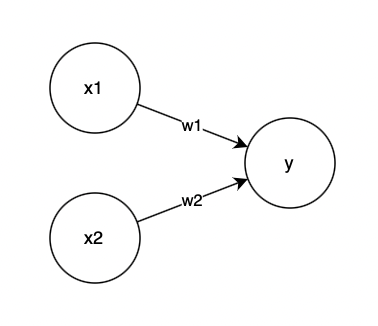

- $w_1, w_2$는 가중치를 의미
- 동그라미는 뉴런(노드)
- 입력 신호가 뉴런에 보내질 때는 가중치가 곱해짐
- 뉴런에서 보내온 신호의 총합이 **기준치를 넘어섰을 때에만** 1을 출력 (뉴런 활성화)
( 여기서 기준치란 임계값 θ)
- 가중치는 전류에서 말하는 저항에 해당. 저항은 전류의 흐름을 억제하는 매개변수로 저항인 낮을수록 큰 전류가 흐름. 그러나 퍼셉트론의 가중치는 각 신호가 결과에 주는 영향력을 조절하는 요소로 사용됨. 한편, **퍼셉트론의 가중치는 그 값이 클수록 강한 신호**를 흘려보냄. 이처럼 서로 작용하는 방향은 다르지만, 신호가 얼마나 잘(어렵게) 흐르는가를 통제한다는 점에서는 같은 기능.

## ✅ 단순한 논리회로
### ▶ AND gate
- 입력 2 출력 1 ➡ 두 입력이 모두 1일때만 1 출력. 이외에는 0출력.
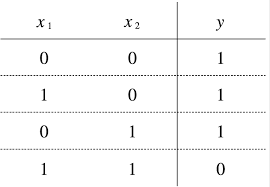
- 위 진리표를 만족하는 매개변수($w_1, w_2, θ$)의 조합은?
    - (0.5, 0.5, 0.7), (1.0, 1.0, 1.0) 등.. 
    - **$x_1과 x_2$ 이 모두 1일때만 $θ$값을 초과하여 뉴런 활성화**
    
### ▶ NAND gate, OR gate
- NAND란 Not AND를 의미 : AND gate의 출력을 뒤집은 것
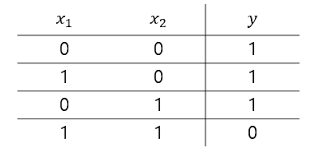
- AND gate를 구현하는 매개변수의 부호를 모두 반전시키면 NAND gate가 된다
- 즉, (-0.5, -0.5, -0.7) 조합은 NAND gate를 만족한다

### Note
- 위에서는 진리표를 보고 직접 퍼셉트론의 매개변수를 선정하였다.
- 하지만, 기계학습에서는 이 매개변수를 컴퓨터가 자동으로 선정하도록 한다.
- 컴퓨터가 매개변수를 선정할 수 있도록 퍼셉트론의 구조(model)을 고민하고, 컴퓨터에 학습 데이터를 주어야 한다.


## ✅ 퍼셉트론 구현하기
### ▶ 간단한 구현
- AND

In [9]:
def AND (x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    temp = x1*w1 + x2*w2
    if temp <= theta: return 0
    elif temp > theta: return 1
    
print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))

0
0
0
1


### ▶ 가중치 Weight & 편향 Bias
$
y = \begin{cases}0  \;if\;b + w_1x_1 + w_2x_2 <= 0\\
1  \;if\; b + w_1x_1 + w_2x_2 > 0\end{cases}
$

- 여기서 $b$ 를 편향(bias), $w_1와 w_2$ 는 그대로 가중치(weight)
- $θ$ 값을 $-b$로 치환

In [11]:
import numpy as np
x = np.array([0, 1]) # input
w = np.array([0.5, 0.5]) # weight
b = -0.7 # bias

print(w*x)
print(np.sum(w*x))
print(np.sum(w*x) + b)

[0.  0.5]
0.5
-0.19999999999999996


- 가중치와 편향 구현하기

In [16]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))

0
0
0
1


## ✅ 단층 퍼셉트론의 한계
### ▶ XOR gate (X)
- **단층 퍼셉트론으로는 XOR gate 구현 불가능**
    - 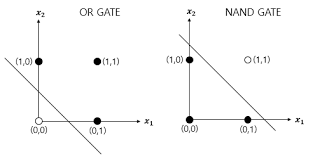
    - 퍼셉트론은 **직선** 으로 나뉜 두 영역을 만든다 **(선형 영역 표현)**
    - 그러나, XOR은 직선으로 나눌 수 없다
        - (Single-Layer Perceptrons cannot classify non-linearly separable data point)
    - 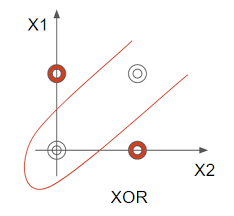
    - 위 그림과 같이 XOR은 **곡선** 으로 영역을 나누어야 한다 **(비선형 영역 표현)**
 
 ## ✅ 다층 퍼셉트론
 ### ▶ XOR gate (O)
 - we can separate it by two straight lines. Consider the diagram below
 - 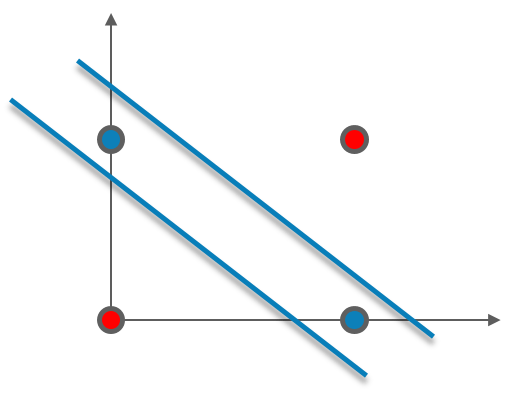
 

In [17]:
def OR(x1, x2): # AND와 weight 만 다름
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

print(XOR(0, 0))
print(XOR(1, 0))
print(XOR(0, 1))
print(XOR(1, 1))

0
1
1
0
